## Import the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Importing the Data

In [2]:
raw_csv_data=pd.read_csv('https://raw.githubusercontent.com/a7madmostafa/365datascience/master/20%20-%20Time%20Series%20Analysis%20in%20Python/3_Introduction%20to%20Time%20Series%20in%20Python/1_Introduction%20to%20Time%20Series%20Data%20(3%3A56)/Index2018.csv')

In [3]:
df_comp=raw_csv_data.copy()

## Exploring the Data

In [4]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


Note: S&P 500-spx-USA , DAX 30-dax-Germany , FTSE 100-ftse-London(UK) , NIKKEI 225-nikkei-Japan

In [5]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [6]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Plotting the Data

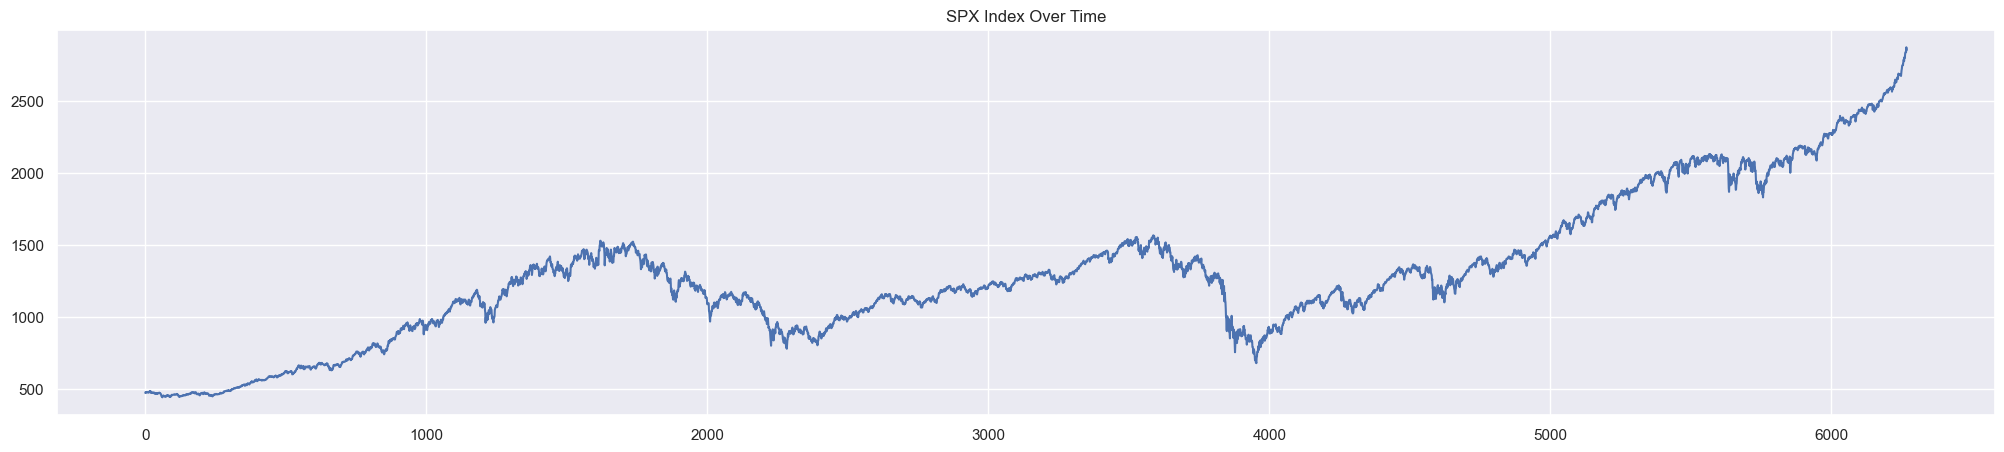

In [7]:
df_comp.spx.plot(figsize=(25, 5),title='SPX Index Over Time')
plt.show()

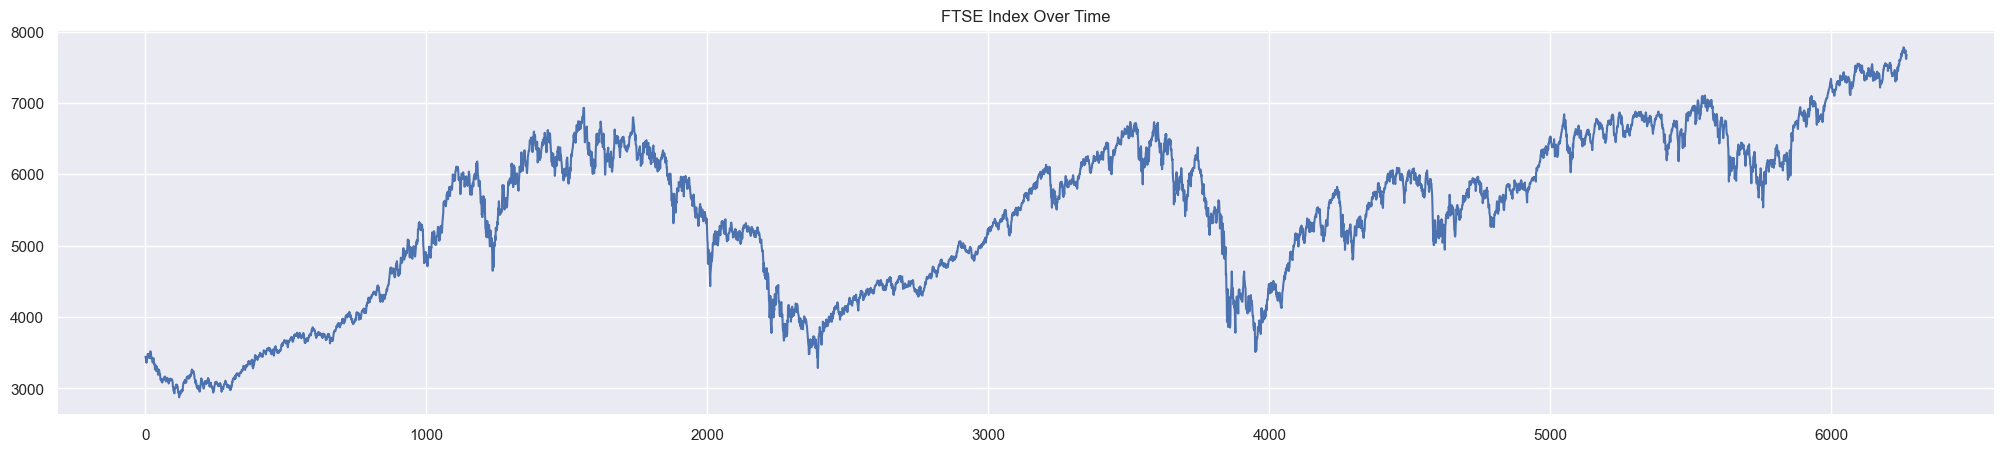

In [8]:
df_comp.ftse.plot(figsize=(25, 5),title='FTSE Index Over Time')
plt.show()

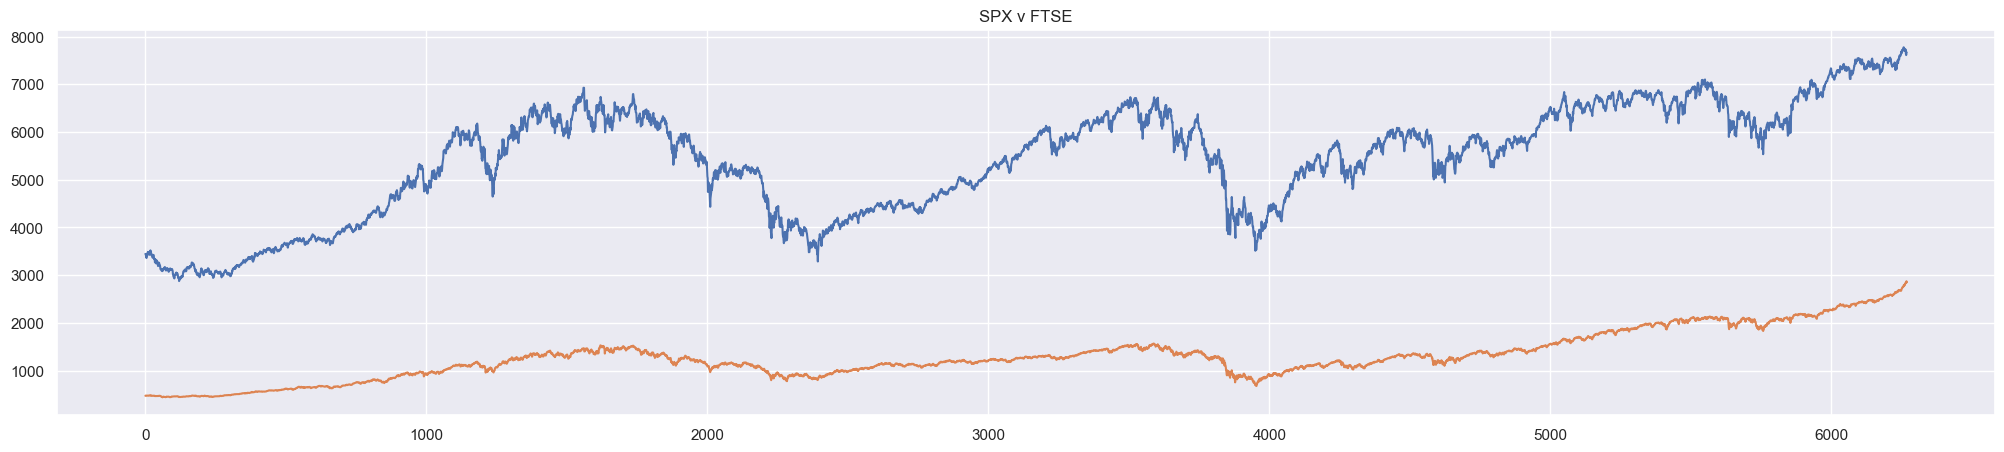

In [9]:
df_comp.ftse.plot(figsize=(25, 5),title='FTSE Index Over Time')
df_comp.spx.plot(figsize=(25, 5),title='SPX Index Over Time')
plt.title('SPX v FTSE')
plt.show()

### QQ Plot

In [10]:
import scipy.stats
import pylab

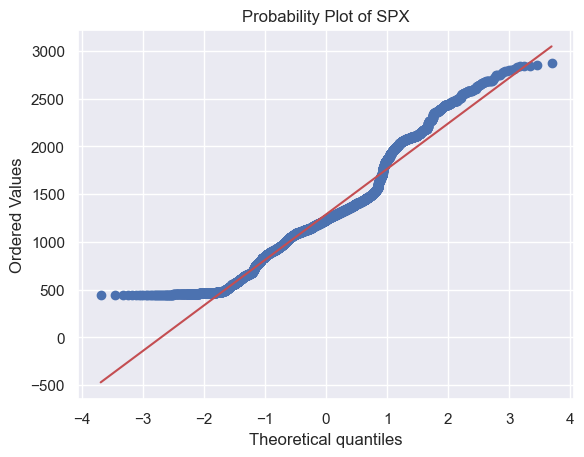

In [11]:
scipy.stats.probplot(df_comp.spx , plot=plt)
plt.title('Probability Plot of SPX')
plt.show()

## Analysing and Using the Time Period

In [12]:
df_comp.date.describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

In [13]:
df_comp.date=pd.to_datetime(df_comp.date, dayfirst=True)

In [14]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [15]:
df_comp.date.describe()

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

### Setting the index

In [16]:
df_comp.set_index("date", inplace=True)

In [17]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Analysing freqencies

In [18]:
df_comp=df_comp.asfreq('d')

In [19]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


In [20]:
df_comp=df_comp.asfreq('b')

In [21]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Handling Missing Values

In [22]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [23]:
df_comp.spx = df_comp.spx.ffill()

In [24]:
df_comp.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [25]:
df_comp.ftse=df_comp.ftse.bfill()

In [26]:
df_comp.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [27]:
df_comp.dax=df_comp.dax.fillna(value = df_comp.dax.mean())

In [28]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [29]:
df_comp.nikkei=df_comp.nikkei.fillna(value = df_comp.nikkei.mean())

In [30]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [31]:
df_comp.rename(columns={'spx': 'market_value'}, inplace=True)

In [32]:
df_comp.head()

,market_value,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [33]:
df_comp.describe()

,market_value,dax,ftse,nikkei
count,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.055700
std,487.868210,2752.604984,1145.568370,4040.545253
min,438.920000,1911.700000,2876.600000,7054.980000
25%,992.715221,4070.460000,4487.880000,10711.090000
50%,1233.761241,5774.380000,5663.300000,15014.040000
75%,1460.250000,7442.660000,6304.630175,17858.420000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [34]:
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

In [35]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


## Spliting the Data

In [36]:
size = int(len(df_comp)*0.8)

In [37]:
df_train = df_comp.iloc[:size]

In [38]:
df_test = df_comp.iloc[size:]

In [39]:
df_train.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [40]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623
